In [3]:
import numpy as np
import random
import sympy
import math

# Count-Min Sketch 

In [4]:
# parameters: With pr. at least 1-delta, we get at most epsilon*n more than true count for each element
prime = 524287 #2**31-1  Mersenne prime



def initparameters(epsilon,delta):
    width = math.ceil(math.e/epsilon)
    depth = math.ceil(np.log(1/delta)) #Number of Hash Functions
    a = random.sample(range(1, prime-1), depth) #pick distinct values
    b = random.sample(range(1, prime-1), depth) #so that hash functions differ (unlikley tough)
    print(width,depth)
    return(a,b,width,depth)

def initCMS(width,depth):
    counter = np.zeros((depth, width))
    return(counter)
    

In [5]:
def lookup_min_count(value, counter, a, b, mod,width):
    temp = counter[hash(value, a[0], b[0], mod,width)][0]
    for i in range(1,depth):
        if counter[hash(value,a[i],b[i],mod,width)][i] < temp:
            temp = counter[hash(value,a[i],b[i],mod,width)][i]
    count = temp
    return(count)

In [6]:

def count(value, counter, a, b, mod, width):
    for i in range(0, depth):
        counter[hash(value,a[i],b[i],mod,width)][i] += 1
    return(counter)

In [7]:
#basic Hash-Function
def hash(value,a,b,mod,width):
    return(((value * a) + b) % mod % width)

In [8]:
#conservative update
def cons_count(value, counter, a, b, mod):
    lowest_current_count = lookup_min_count(value, counter, a, b, mod, len(counter[0]))
    for i in range(0, depth):
        if counter[hash(value,a[i],b[i],mod)][i] == lowest_current_count:
            counter[hash(value,a[i],b[i],mod)][i] += 1
    return(counter)

# Integer Data Stream Generator

# Counting Shakespeare

In [9]:
#Complete works of shakespeare word by word
text = open('shakespeare.txt').read().split()

#delete Copyright notice
i = 0
while i != len(text):
    if text[i] == "<<THIS":
        while text[i] != "MEMBERSHIP.>>":
            del text[i]
        del text[i]
        i += 1
    text[i] = text[i].lower()
    i+=1

textOut = open("test.txt","w")
for i in range(0,len(text)):
    textOut.write(text[i] + " ")
textOut.close()

In [10]:
def hashString(word,a,b,width):
    sumOf = 0
    for i in range(0,len(word)):
        sumOf += (ord(word[i]) * (31**i))
    hashValue = (((a * sumOf) + b) % 524287) % width
    return hashValue

In [11]:
text = open("lowerCase.txt").read().split()
print(len(text))

882358


In [12]:
#Initialize CMS
parameters = initparameters(1000/len(text),0.01)
counter = initCMS(parameters[2],parameters[3])
counterCons = initCMS(parameters[2],parameters[3])

2399 5


In [13]:
#hash each word and put it into CMS
for i in range(0,len(text)):
    for j in range(0,parameters[3]):
        counter[j][hashString(text[i],parameters[0][j],parameters[1][j],parameters[2])] +=  1

In [14]:
#Conservative Update
for i in range(0,len(text)):
    tempSafe = [0] * parameters[3]
    for j in range(0,parameters[3]):
        tempSafe[j] = counterCons[j][hashString(text[i],parameters[0][j],parameters[1][j],parameters[2])]
    currentMin = tempSafe[0]
    savedIndex = 0
    for a in range(0,parameters[3]-1): #Find smallest count
        if currentMin > tempSafe[a+1]:
            savedIndex = a+1
            currentMin = tempSafe[a+1]
    for b in range(0,parameters[3]):  #Update all smallest counts
        if tempSafe[b] == tempSafe[savedIndex]:
            counterCons[b][hashString(text[i],parameters[0][b],parameters[1][b],parameters[2])] += 1

In [15]:
minValue = prime
for a in range(0,parameters[3]):
    position = hashString("the",parameters[0][a],parameters[1][a],parameters[2])
    if minValue >= counterCons[a][position]:
        minValue = counterCons[a][position]
print(minValue)

27360.0


In [37]:
minValue = prime
for a in range(0,parameters[3]):
    position = hashString("at",parameters[0][a],parameters[1][a],parameters[2])
    if minValue >= counter[a][position]:
        minValue = counter[a][position]
count = 0
for b in range(0,len(text)):
    if text[b] == "glut":
        count += 1
print(minValue)
print(count)

2605.0
1


In [38]:
frequentWords = ["the","and","i","to","of","a","you","my","in","that","is","not","with","me","it","for","be","his","your","this","but","he","have","as","thou","him","so","will","what","thy","all","her","no","do","by","shall","if","are","we","thee","our","lord","on","king","good","now","sir","from", "come","at"]
Numero = [0] * 50

for i in range(0,len(Numero)):
    Numero[i] += i+1 
 
trueCount = [0] * len(frequentWords)
for i in range(0,len(frequentWords)):
    trueCount[i] = 0
    for j in range(0,len(text)):
        if text[j] == frequentWords[i]:
            trueCount[i] += 1

CmsCount = [0] * len(frequentWords)
for i in range(0,len(frequentWords)):
    minValue = prime
    for a in range(0,parameters[3]):
        position = hashString(frequentWords[i],parameters[0][a],parameters[1][a],parameters[2])
        if minValue >= counter[a][position]:
            minValue = counter[a][position]
    CmsCount[i] = minValue

CmsCountCons = [0] * len(frequentWords)
for i in range(0,len(frequentWords)):
    minValue = prime
    for a in range(0,parameters[3]):
        position = hashString(frequentWords[i],parameters[0][a],parameters[1][a],parameters[2])
        if minValue >= counterCons[a][position]:
            minValue = counterCons[a][position]
    CmsCountCons[i] = minValue    
    

    
Difference = [0] * len(frequentWords)
for i in range(0,len(frequentWords)):
    Difference[i] = CmsCount[i] - trueCount[i]

# Mean Error Calculation

In [26]:
sumF = 0
for i in range(0,len(trueCount)):
    sumF += CmsCountCons[i] - trueCount[i]
print(sumF/len(trueCount))

0.38


In [27]:
print((1.3+1.22+1.02+1.3+1.18)/5)

1.204


# Visualization 

In [28]:
import matplotlib.pyplot as plt
import matplotlib

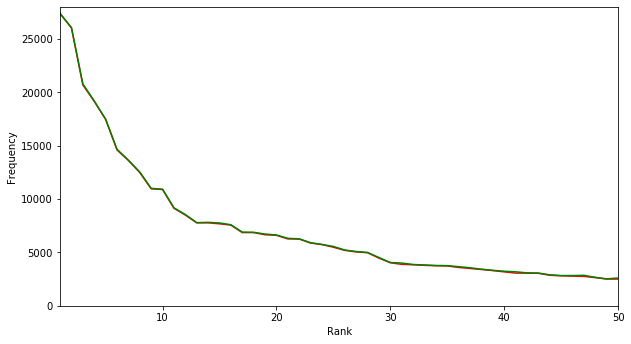

In [29]:

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 5.5)
plt.plot(Numero, trueCount, 'r', Numero, CmsCount, 'g')
#plt.plot(Numero, trueCount)
plt.axis([1,50,0,28000])

plt.ylabel('Frequency')
plt.xlabel('Rank')
fig.savefig('1per1000error.png', dpi=100)
#plt.yscale('log')

plt.show()

# Growth of width in CMS with growing size of DS

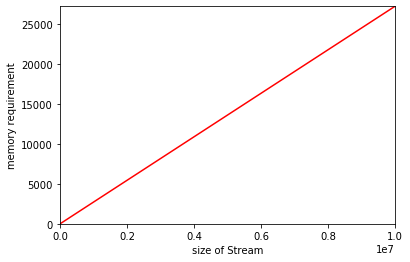

In [30]:
sizeOfDS = [0] * 5
y = [0] * len(sizeOfDS) 
for i in range(0,len(sizeOfDS)):
    sizeOfDS[i] = 1000 * (10**i)
    y[i] = math.ceil(math.e/(1000/sizeOfDS[i]))
    
    
plt.plot(sizeOfDS,y,'r' )
plt.axis([0,sizeOfDS[len(sizeOfDS)-1],0,y[len(sizeOfDS)-1]])
plt.ylabel("memory requirement")
plt.xlabel("size of Stream")
plt.show()

# Non-random integers

In [22]:
def hashInt(int,a,b,width):
    hashValue = (((a * int) + b) % 524287) % width
    return hashValue


In [226]:
import random
#initialize a elements each with count n
def initNR(a,n):
    NRint = random.sample(range(1,prime),n)
    values = NRint
    for i in range(0,len(NRint)):
        for j in range(0,a-1):
            NRint.append(NRint[i])
    return NRint,values

# Uniform Distribution

In [766]:
#Pick n and the uniform integers
initFrequencyPer = 32
numberOfElements = 27946
NRint, values = initNR(initFrequencyPer, numberOfElements)
parameters = initparameters(0.000486,0.01)
counterInt = initCMS(parameters[2],parameters[3])
print(len(NRint))

5594 5
894272


In [767]:
#hash each int and put it into CMS
def CMSINT(counter,NRint,parameters):
    for i in range(0,len(NRint)):
        for j in range(0,parameters[3]):
            counter[j][hashInt(NRint[i],parameters[0][j],parameters[1][j],parameters[2])] +=  1
    return counter

In [768]:
counterInt = CMSINT(counterInt,NRint,parameters)

In [769]:
def CountFrequency(counter,numberOfElements,parameters):
    CountInt = [0] * numberOfElements
    for i in range(0,numberOfElements-1):
        minValue = prime
        for a in range(0,parameters[3]):
            position = hashInt(values[i],parameters[0][a],parameters[1][a],parameters[2])
            if minValue >= counter[a][position]:
                minValue = counter[a][position]
        CountInt[i] = minValue
    return CountInt


In [770]:
CountInt = CountFrequency(counterInt,numberOfElements, parameters)
trueCount = [initFrequencyPer] * numberOfElements

# Conservative update

In [771]:
counterIntCons = initCMS(parameters[2],parameters[3])
                                                  
#hash each int and put it into CMS-cons
for i in range(0,len(NRint)):
    savedIndex = 0
    tempSafe = [0] * parameters[3]
    for j in range(0,parameters[3]):
        tempSafe[j] = counterIntCons[j][hashInt(NRint[i],parameters[0][j],parameters[1][j],parameters[2])]
    currentMin = tempSafe[0]
    savedIndex = 0
    for a in range(1,parameters[3]):     
        if tempSafe[a] < currentMin:
            currentMin = tempSafe[a] 
            savedIndex = a
    for b in range(0,parameters[3]):
        if tempSafe[b] == tempSafe[savedIndex]:
            counterIntCons[b][hashInt(NRint[i],parameters[0][b],parameters[1][b],parameters[2])] +=  1

In [772]:
CountIntCons = [0] * numberOfElements
trueCountCons = [initFrequencyPer] * numberOfElements

for i in range(0,numberOfElements-1):
    minValue = prime
    for a in range(0,parameters[3]):
        position = hashInt(values[i],parameters[0][a],parameters[1][a],parameters[2])
        if minValue >= counterIntCons[a][position]:
            minValue = counterIntCons[a][position]
    CountIntCons[i] = minValue

# Plot Non-random ints

In [773]:
def plotCompareToTrue(trueCount,Count,name):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(8, 4.5)
    plt.plot(trueCount, 'r', linewidth=2.0, label="True count")
    plt.plot(Count, 'g', linewidth=0.5, label="Approximate count")
    #plt.plot(Numero, trueCount)
    plt.axis([0,27946,0,1000])
    
    plt.legend()
    
    plt.ylabel('Frequency')
    plt.xlabel('Integer value')
    fig.savefig(name, dpi=100)
    #plt.yscale('log')
    

    plt.show()

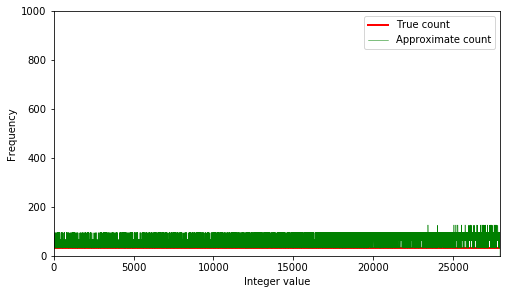

In [774]:
plotCompareToTrue(trueCount,CountIntCons,'NRint2.png')

# Error Calculation

In [775]:
sum = 0
for i in range(0,numberOfElements-1):
    sum += CountIntCons[i] - trueCountCons[i] 
print(sum/numberOfElements-1)

33.107886638517144


In [744]:
#for 0.0011 original version fpr 4.4.1
print((245.38+244.80+245.72+244.68+245.16)/5)

245.148


In [745]:
#for conservative update
print((111.89+111.55+111.21+112.56+112.82)/5)

112.006


In [723]:
#for better parameters conservative version
print((94.36+94.087+95.20+93.724+94.24)/5)

94.3222


In [776]:
#perfect ratio
print((33.16+33.43+33.60+33.30+33.10)/5)

33.318
